In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier as xgb

from sklearn import preprocessing 

import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

from sklearn.metrics import classification_report, confusion_matrix 


### MODELADO

In [2]:
final_df_labels = pd.read_csv(r"final_df_labels.csv")

In [3]:
# final_df_labels_2.info()

In [4]:
final_df_labels["datetime"] = pd.to_datetime(final_df_labels["datetime"], format="%Y-%m-%d %H:%M:%S")

# 2021-01-02 06:00:00

In [5]:
# final_df_labels.info()

In [6]:
final_df_labels.describe()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error5_count,Part_1,Part_2,Part_3,Part_4,age,model_ALPHA 560 UNIVERSAL,model_JACQUARD TF,model_NOVA 62,model_NOVA 6HS
count,154406.000000,154406,154406.000000,154406.000000,154406.000000,154406.000000,154406.000000,154406.000000,154406.000000,154406.000000,...,154406.000000,154406.000000,154406.000000,154406.000000,154406.000000,154406.000000,154406.000000,154406.000000,154406.000000,154406.000000
mean,24.189021,2021-07-03 05:56:48.629198336,170.737328,446.630071,100.824084,40.384851,13.319525,44.401802,8.868878,4.438182,...,0.009287,49.911593,52.404424,50.749242,52.571153,10.830350,0.150959,0.320758,0.113215,0.415068
min,1.000000,2021-01-02 06:00:00,125.532506,211.811184,73.951948,26.569635,0.025509,0.078991,0.043181,0.015278,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,2021-04-03 06:00:00,164.436951,427.599581,96.235947,38.155272,8.029099,26.879250,5.344680,2.682179,...,0.000000,13.125000,11.375000,13.125000,13.000000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2021-07-03 06:00:00,170.395369,448.393288,100.200259,40.146202,12.497552,41.764406,8.337897,4.177411,...,0.000000,32.250000,28.125000,31.750000,32.125000,10.000000,0.000000,0.000000,0.000000,0.000000
75%,36.000000,2021-10-02 06:00:00,176.593409,468.477268,104.428063,42.232505,17.708083,59.016518,11.759020,5.900687,...,0.000000,66.500000,65.500000,64.500000,65.750000,16.000000,0.000000,1.000000,0.000000,1.000000
max,47.000000,2022-01-01 06:00:00,228.679545,586.682904,162.298051,66.535850,58.444332,179.637880,34.380664,18.305595,...,2.000000,315.875000,339.875000,318.875000,394.875000,20.000000,1.000000,1.000000,1.000000,1.000000
std,13.878233,NaN,9.443919,33.241003,7.342011,3.452367,6.984298,23.193107,4.651587,2.317079,...,0.096393,53.279712,63.637131,56.634312,60.575753,5.548277,0.358010,0.466770,0.316856,0.492735


In [7]:
final_df_labels.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,Part_1,Part_2,Part_3,Part_4,age,model_ALPHA 560 UNIVERSAL,model_JACQUARD TF,model_NOVA 62,model_NOVA 6HS,failure
0,1,2021-01-02 06:00:00,180.857530,470.172113,94.280586,42.585979,22.634509,22.853920,1.881499,6.693348,...,155.250,65.250,35.250,125.250,2,0,1,0,0,none
1,1,2021-01-02 09:00:00,190.106712,472.050647,101.401050,41.230043,15.099202,19.501492,2.798117,4.135271,...,155.375,65.375,35.375,125.375,2,0,1,0,0,none
2,1,2021-01-02 12:00:00,156.143089,473.039256,94.087971,45.381425,15.992174,62.777583,4.986140,5.430938,...,155.500,65.500,35.500,125.500,2,0,1,0,0,none
3,1,2021-01-02 15:00:00,158.458223,422.208281,98.615362,38.839316,19.404615,83.613846,4.573212,2.846899,...,155.625,65.625,35.625,125.625,2,0,1,0,0,none
4,1,2021-01-02 18:00:00,160.116287,444.272739,107.573098,36.189106,10.283735,32.058147,10.977006,1.199312,...,155.750,65.750,35.750,125.750,2,0,1,0,0,none


In [8]:
# Pto quiebre: Dividmos el dataset en las primeras fechas para training y el para Testing
threshold_dates = [
    pd.to_datetime("2021-09-30 01:00:00"), pd.to_datetime("2021-10-01 01:00:00")
]

In [9]:
threshold_dates

[Timestamp('2021-09-30 01:00:00'), Timestamp('2021-10-01 01:00:00')]

In [10]:
test_results = []
models = []
total = len(threshold_dates)

last_train_date = threshold_dates[0]
first_test_date = threshold_dates[1]

In [11]:
ntraining = final_df_labels.loc[final_df_labels["datetime"] < last_train_date]
ntesting = final_df_labels.loc[final_df_labels["datetime"] > first_test_date]
print(f"{ntraining.shape[0]} para training.")
print(f"{ntesting.shape[0]} para testing")
print(f"{ntesting.shape[0] / ntraining.shape[0] * 100:0.1f}% de los datos se usarán para pruebas.")

114865 para training.
39117 para testing
34.1% de los datos se usarán para pruebas.


In [12]:
fails_train = ntraining[ntraining["failure"] != "none"].shape[0]
no_fails_train = ntraining[ntraining["failure"] == "none"].shape[0]
fails_test = ntesting[ntesting["failure"] != "none"].shape[0]
no_fails_test = ntesting[ntesting["failure"] == "none"].shape[0]

print(f"{fails_train / no_fails_train * 100:0.1f}% de los casos son fallas en set de entrenamiento.")
print(f"{fails_test / no_fails_test * 100:0.1f}% de los casos son fallas en set de pruebas.")

1.8% de los casos son fallas en set de entrenamiento.
1.6% de los casos son fallas en set de pruebas.


Nos deshacemos de la data datetime, machineID, y failure para los conjuntos de "*features*".
La razón por la cual se bota el "datetime" es porque ya tenemos una variable de tiempo pero numérica que nos puede ayudar a predecir, cuando hicimos la conversión del DF_Maintenance en la cual a cada parte le pusimos días desde su último mantenimiento.

In [13]:
label_encoder = preprocessing.LabelEncoder() 

final_df_labels['failure']= label_encoder.fit_transform(final_df_labels['failure']) 

In [14]:
## A la vez que tomamos el training dataset basado en las fechas mas antiguas y el test dataset basado en las fechas mas recientes, 
## también, eliminamos/dropeamos las columnas de datetime, machineId y Failure que es nuestra target label.
train_y = final_df_labels.loc[final_df_labels["datetime"] < last_train_date, "failure"]
train_X = final_df_labels.loc[final_df_labels["datetime"] < last_train_date].drop(["datetime",
                                                                                    "machineID",
                                                                                    "failure"], axis=1)
test_y = final_df_labels.loc[final_df_labels["datetime"] > first_test_date, "failure"]
test_X = final_df_labels.loc[final_df_labels["datetime"] > first_test_date].drop(["datetime",
                                                                                   "machineID",
                                                                                   "failure"], axis=1)

In [15]:
train_X.head(3)

,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,...,error5_count,Part_1,Part_2,Part_3,Part_4,age,model_ALPHA 560 UNIVERSAL,model_JACQUARD TF,model_NOVA 62,model_NOVA 6HS
0,180.857530,470.172113,94.280586,42.585979,22.634509,22.853920,1.881499,6.693348,170.299151,410.106823,...,0.0,155.250,65.250,35.250,125.250,2,0,1,0,0
1,190.106712,472.050647,101.401050,41.230043,15.099202,19.501492,2.798117,4.135271,170.514516,410.496539,...,0.0,155.375,65.375,35.375,125.375,2,0,1,0,0
2,156.143089,473.039256,94.087971,45.381425,15.992174,62.777583,4.986140,5.430938,171.619836,420.734019,...,0.0,155.500,65.500,35.500,125.500,2,0,1,0,0


In [16]:
train_y.head(2)

0    4
1    4
Name: failure, dtype: int32

In [17]:
train_y.unique()
## Donde 4 = None, 0 = Part_1, 1 = Part_2, 2 = Part_3, 3 = Part_4, donde cada Part es la parte que falla de la máquina.

array([4, 0, 1, 2, 3])

#### Modelando con LogisticRegression

In [18]:
LREG = LogisticRegression(max_iter=200).fit(train_X, train_y)

C:\Users\CLIENTE\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
print(classification_report(test_y, LREG.predict(test_X)))

              precision    recall  f1-score   support

           0       0.31      0.14      0.19       161
           1       0.19      0.09      0.13       233
           2       0.09      0.05      0.07        95
           3       0.00      0.00      0.00       116
           4       0.99      0.99      0.99     38512

    accuracy                           0.98     39117
   macro avg       0.32      0.26      0.27     39117
weighted avg       0.97      0.98      0.98     39117



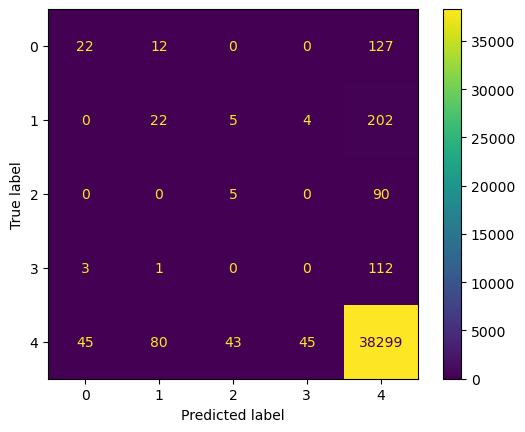

In [21]:
confusion_matrix_3 = confusion_matrix(test_y.to_numpy(), 
                                    LREG.predict(test_X))

cm_display_3 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_3)

cm_display_3.plot()
plt.show()

### El XGBoost lo hace MUCHO mejor

##### Claramente el LogisticRegression es un modelo que sufre mucho a la hora de trabajar con muchas features, y es un modelo que se podría decir está un poco desfasado cuando se tienen opciones mucho más precisas como XGBoost.